## Pré Processamento do Dataset Spotfy

In [1]:
!pip install datasets

In [2]:
import pandas as pd
import numpy as np

from datasets import load_dataset
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Carregar o conjunto de dados Spotify Tracks do Hugging Face.
spotify_tracks_dataset = load_dataset("maharshipandya/spotify-tracks-dataset")

# Obter o conjunto de dados como um DataFrame do Pandas.
dataframe = spotify_tracks_dataset['train'].to_pandas()

print("Dataset Spotify \n")
print(dataframe.head(5))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Dataset Spotify 

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       21

In [4]:
# Verificar se as colunas existem antes de removê-las.
columns_to_drop = ["Unnamed: 0", "track_id", "artists", "track_name", "album_name", "explicit"]
existing_columns = [col for col in columns_to_drop if col in dataframe.columns]

# Remover as colunas se elas existirem.
if existing_columns:
    dataset = dataframe.drop(columns=existing_columns)
else:
    dataset = dataframe.copy()

print(f"Dataset Spotify removido algumas: {columns_to_drop}\n")
print(dataset.head(5))

Dataset Spotify removido algumas: ['Unnamed: 0', 'track_id', 'artists', 'track_name', 'album_name', 'explicit']

   popularity  duration_ms  danceability  energy  key  loudness  mode  \
0          73       230666         0.676  0.4610    1    -6.746     0   
1          55       149610         0.420  0.1660    1   -17.235     1   
2          57       210826         0.438  0.3590    0    -9.734     1   
3          71       201933         0.266  0.0596    0   -18.515     1   
4          82       198853         0.618  0.4430    2    -9.681     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.1430        0.0322          0.000001    0.3580    0.715   87.917   
1       0.0763        0.9240          0.000006    0.1010    0.267   77.489   
2       0.0557        0.2100          0.000000    0.1170    0.120   76.332   
3       0.0363        0.9050          0.000071    0.1320    0.143  181.740   
4       0.0526        0.4690          0.000000    0.0829  

In [5]:
# Remover registros com dados ausentes.
dataset.dropna(inplace=True)

In [6]:
# Selecionar 50% dos registros aleatoriamente.
# dataset_sampled = dataset.sample(frac=0.1, random_state=42)

In [7]:
# Normalização

# Separar a coluna "track_genre"
track_genre = dataset["track_genre"]
dataset = dataset.drop(columns=["track_genre"])

# Identificar e tratar dados ausentes nos atributos numéricos restantes.
numeric_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()
# Preencher dados ausentes com a média das colunas numéricas
for col in numeric_cols:
    dataset[col].fillna(dataset[col].mean(), inplace=True)

# Normalizar os dados numéricos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)
dataset = pd.DataFrame(scaled_data, columns=numeric_cols)

# Reconcatenar a coluna "track_genre"
dataset["track_genre"] = track_genre

print(f"Dataset Spotify Normalizado: {columns_to_drop}\n")
print(dataset.head(5))

Dataset Spotify Normalizado: ['Unnamed: 0', 'track_id', 'artists', 'track_name', 'album_name', 'explicit']

   popularity  duration_ms  danceability  energy       key  loudness  mode  \
0        0.73     0.044043      0.686294  0.4610  0.090909  0.791392   0.0   
1        0.55     0.028566      0.426396  0.1660  0.090909  0.597377   1.0   
2        0.57     0.040255      0.444670  0.3590  0.000000  0.736123   1.0   
3        0.71     0.038557      0.270051  0.0596  0.000000  0.573701   1.0   
4        0.82     0.037969      0.627411  0.4430  0.181818  0.737103   1.0   

   speechiness  acousticness  instrumentalness  liveness   valence     tempo  \
0     0.148187      0.032329          0.000001    0.3580  0.718593  0.361245   
1     0.079067      0.927711          0.000006    0.1010  0.268342  0.318397   
2     0.057720      0.210843          0.000000    0.1170  0.120603  0.313643   
3     0.037617      0.908635          0.000071    0.1320  0.143719  0.746758   
4     0.054508      0.4

In [8]:
# Salvar o DataFrame como um arquivo CSV.
dataset.to_csv('/content/spotify_dataset.csv', index=False, header=False)

##  Estatísticas

Algumas estatísticas descritivas das colunas numéricas, número de registros e o número de colunas no dataset.

In [10]:
# Exibir estatísticas finais do dataset
print("Estatísticas do Dataset:")
print("-----------------------")

# Número de registros e colunas
num_rows, num_cols = dataset.shape
print(f"Número de Registros: {num_rows}")
print(f"Número de Colunas: {num_cols}")
print("-----------------------")

# Estatísticas descritivas das colunas numéricas
print("Estatísticas Descritivas das Colunas Numéricas:")
print(dataset.drop(columns=["track_genre"]).describe())
print("-----------------------")

# Estatísticas descritivas da coluna "track_genre"
print("Estatísticas Descritivas da Coluna 'track_genre':")
print(dataset["track_genre"].describe())
print("-----------------------")

Estatísticas do Dataset:
-----------------------
Número de Registros: 114000
Número de Colunas: 15
-----------------------
Estatísticas Descritivas das Colunas Numéricas:
          popularity    duration_ms   danceability         energy  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.332385       0.043539       0.575432       0.641383   
std         0.223051       0.020487       0.176185       0.251529   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.170000       0.033236       0.462944       0.472000   
50%         0.350000       0.040652       0.588832       0.685000   
75%         0.500000       0.049932       0.705584       0.854000   
max         1.000000       1.000000       1.000000       1.000000   

                 key       loudness           mode    speechiness  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.482649       0.763406       0.637553       0.087722   


## Visualização

Algumas visualizações gráficas pode ser muito útil para entender melhor os dados e identificar padrões ou insights.

- Histogramas para visualizar a distribuição de cada atributo numérico.

- Gráficos de Boxplot para identificar outliers.

- Matriz de Correlação para entender as relações entre os atributos numéricos.

In [11]:
!pip install matplotlib seaborn

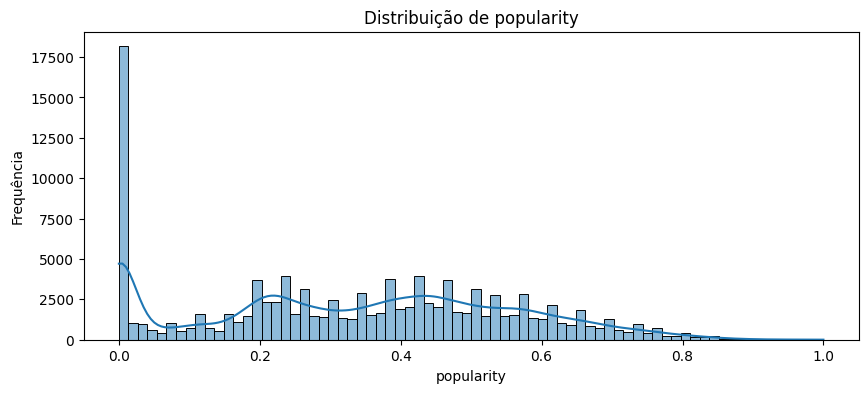

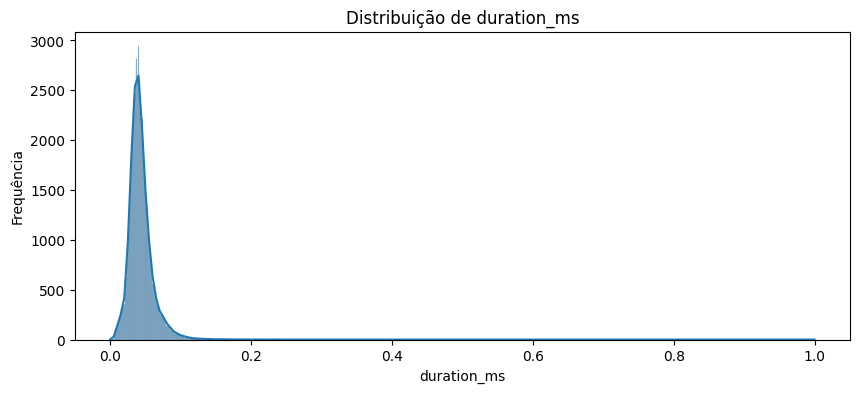

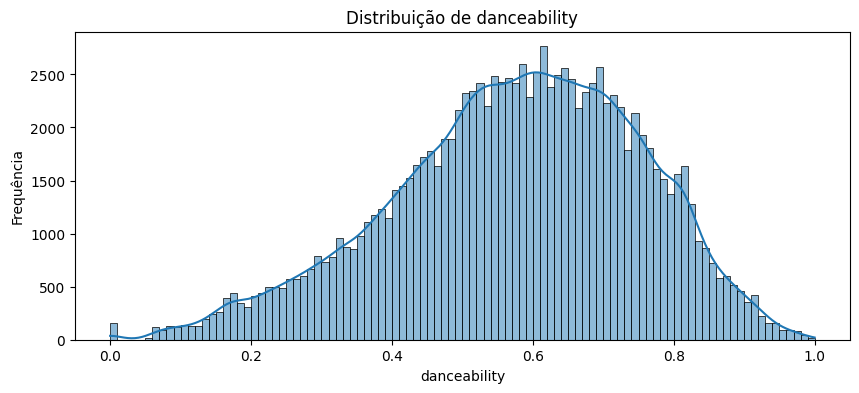

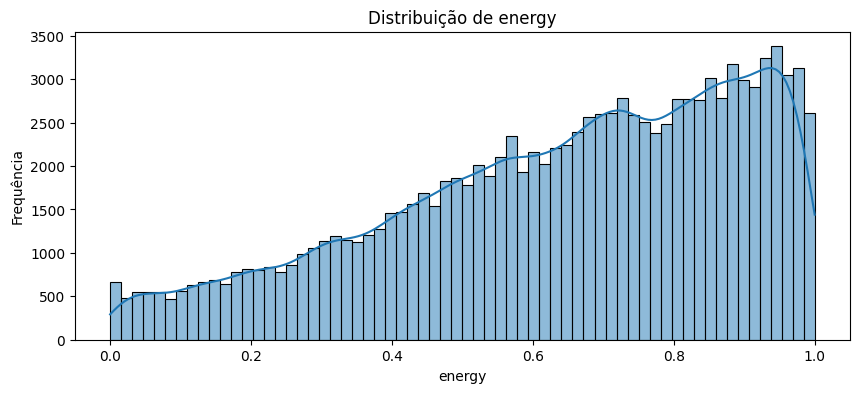

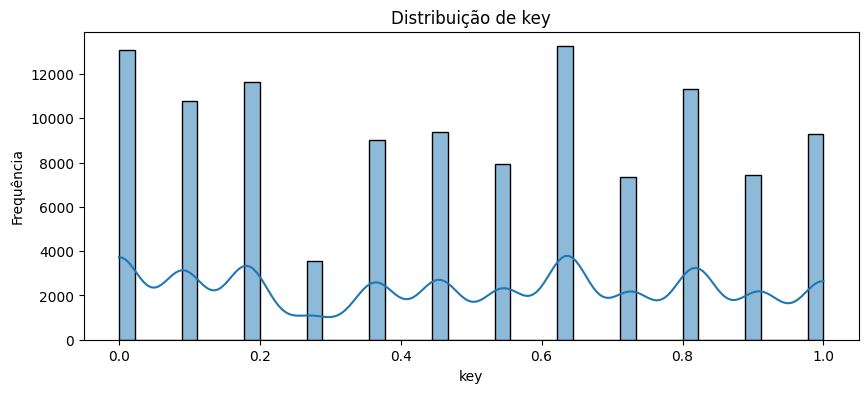

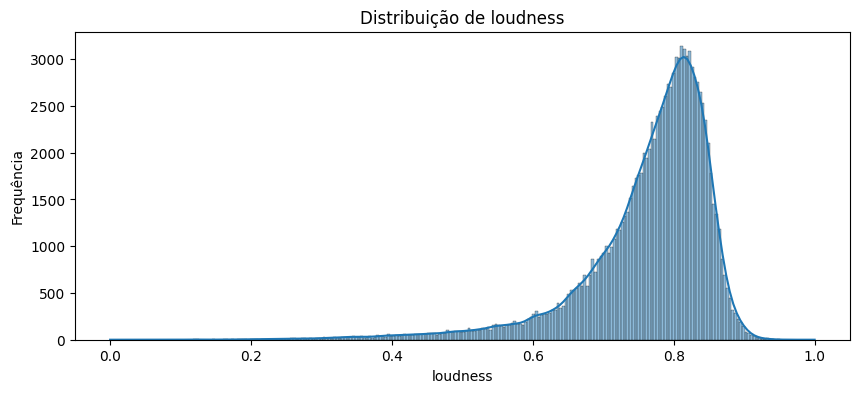

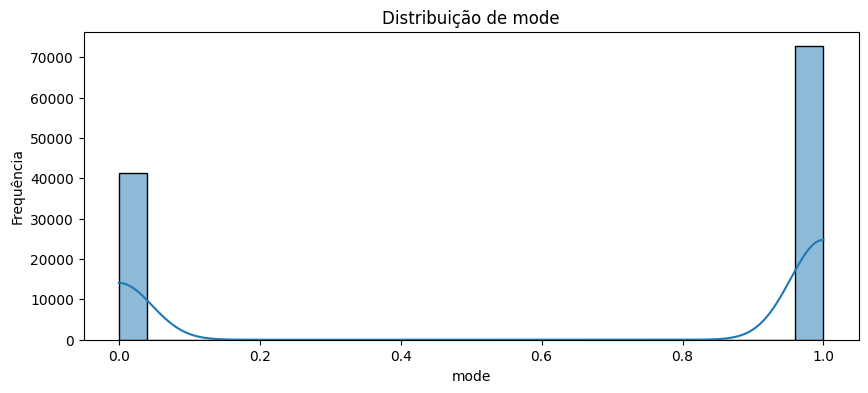

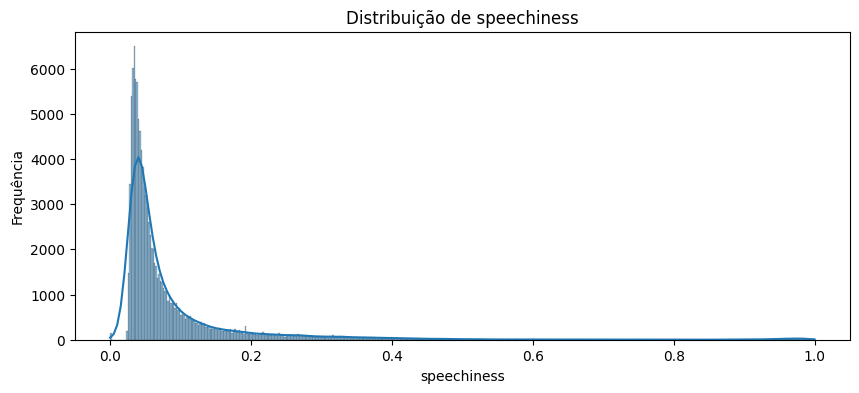

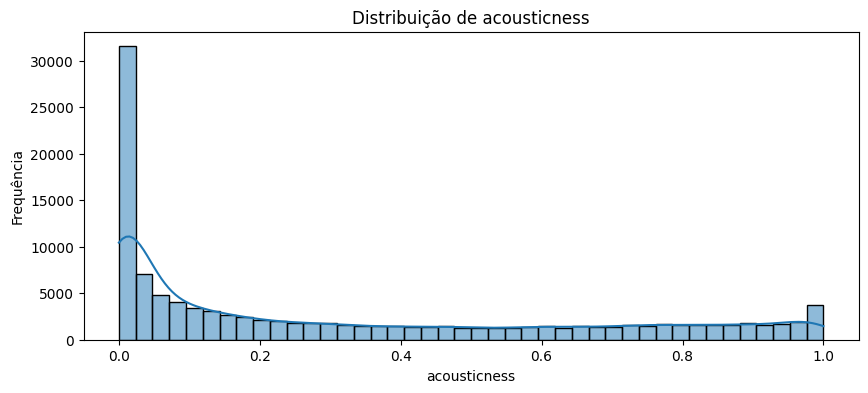

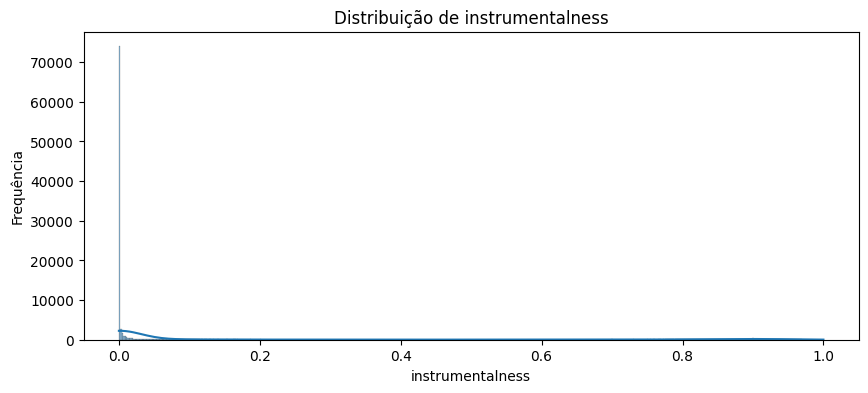

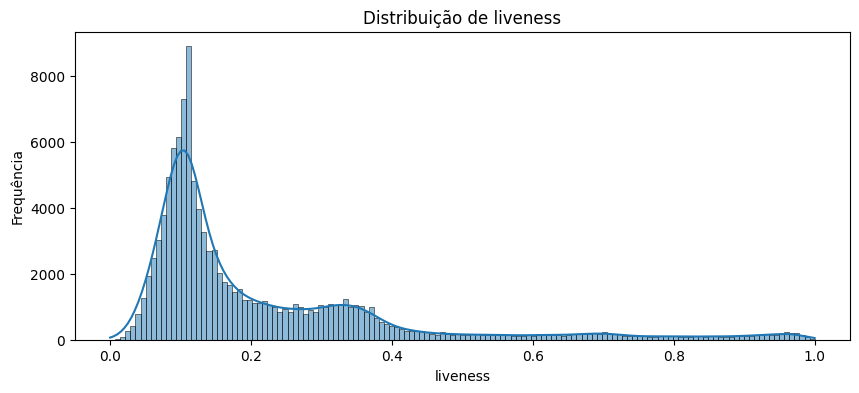

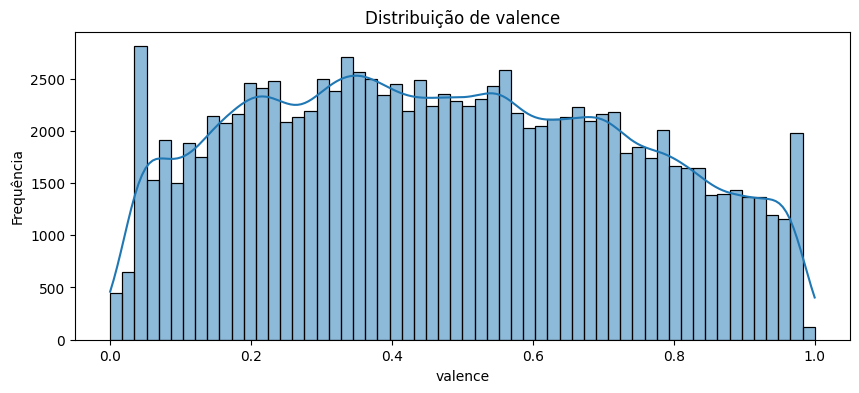

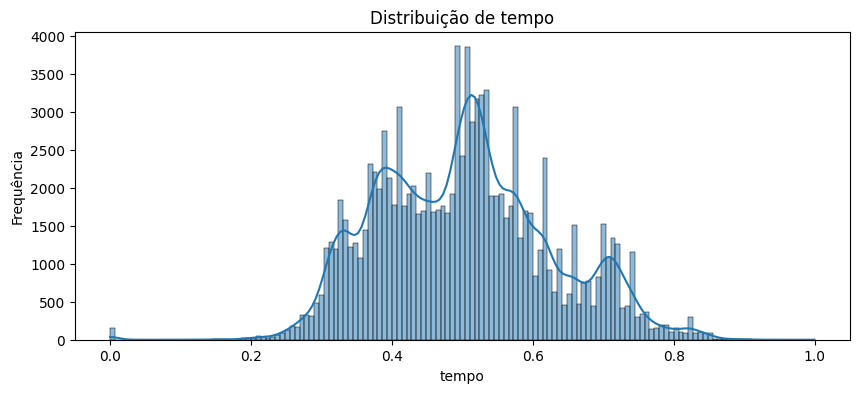

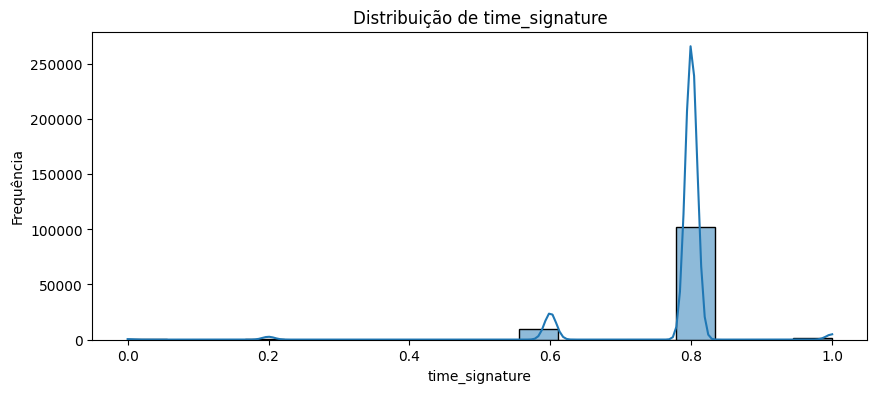

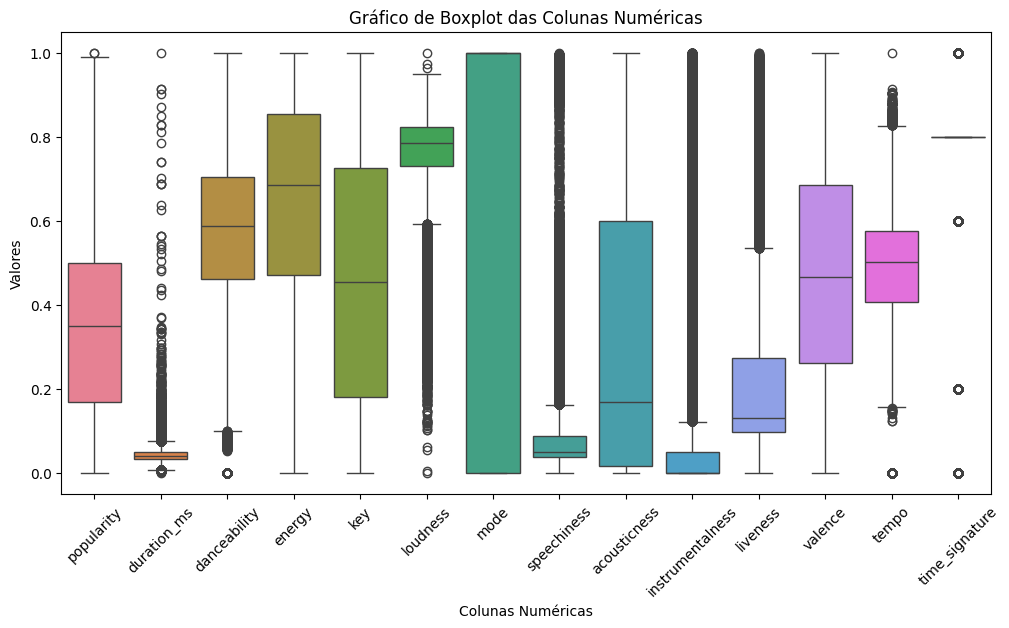

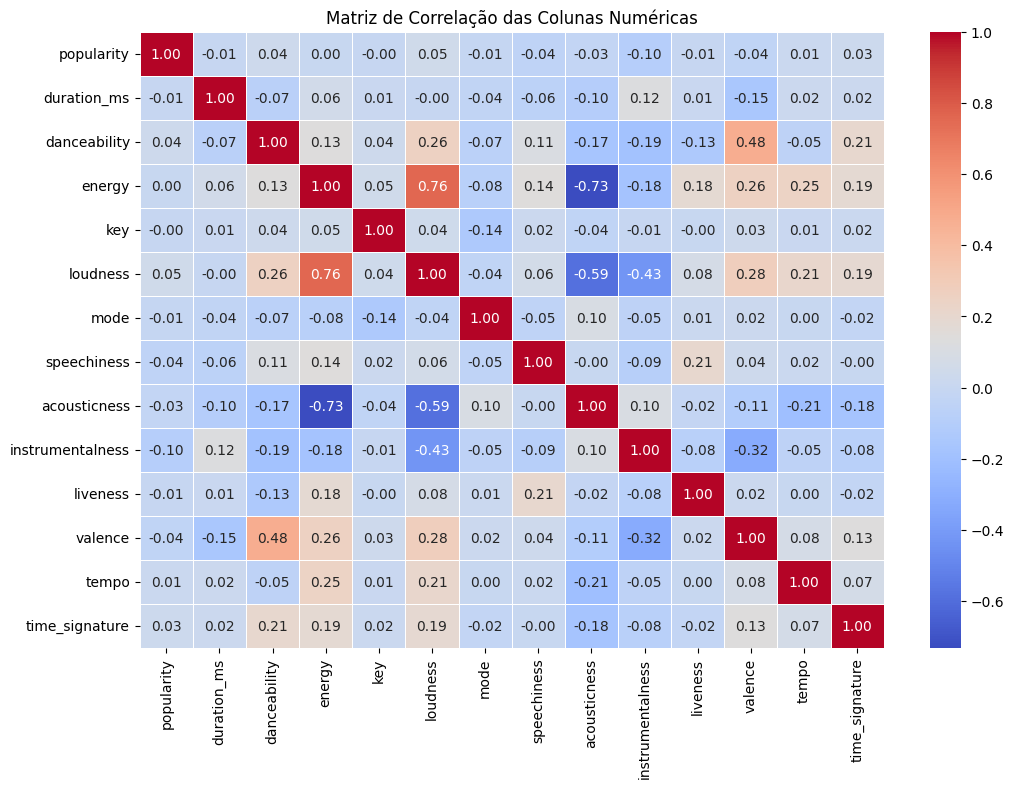

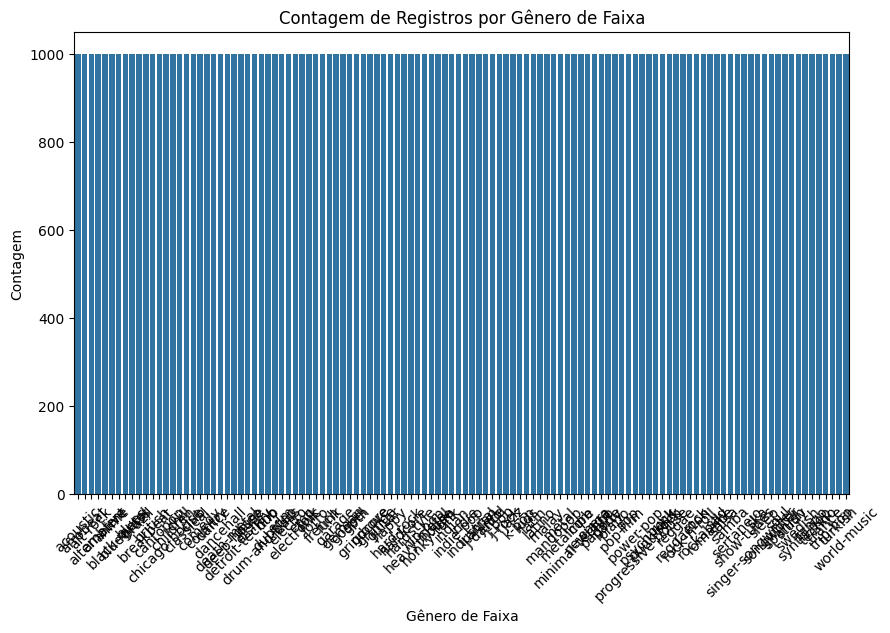

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exibir histogramas das colunas numéricas
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(dataset[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

# Gráfico de Boxplot para identificar outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset[numeric_cols])
plt.title('Gráfico de Boxplot das Colunas Numéricas')
plt.xlabel('Colunas Numéricas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.show()

# Matriz de correlação
correlation_matrix = dataset[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação das Colunas Numéricas')
plt.show()

# Gráfico de contagem para a coluna "track_genre"
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x="track_genre")
plt.title('Contagem de Registros por Gênero de Faixa')
plt.xlabel('Gênero de Faixa')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()
